In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('bank_churn.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   int64  
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   int64  
 7   HasCrCard         9920 non-null   int64  
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 697.6+ KB


In [6]:
df.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,0
2,502,France,Female,42,8,159660.80,3,1,1
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,0


In [9]:
df.duplicated().sum()

5

In [10]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(9915, 9)

In [13]:
Q1 = df.quantile(0.01)
Q3 = df.quantile(0.99)
IQR = Q3 - Q1
df = df[~((df < (Q1-6*IQR)) | (df > (Q3 + 6*IQR))).any(axis = 1)]
df.shape

<ipython-input-13-a6a87c4224dd>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-6*IQR)) | (df > (Q3 + 6*IQR))).any(axis = 1)]
<ipython-input-13-a6a87c4224dd>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1-6*IQR)) | (df > (Q3 + 6*IQR))).any(axis = 1)]


(9915, 9)

In [16]:
df_cat = df.select_dtypes(include="object")
cat= pd.get_dummies(df_cat, drop_first=True)
cat.head()

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0


In [21]:
df_num=df.select_dtypes(include=["int64","float64"])
df_num.head()

,CreditScore,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,42,2,0.00,1,1,1
1,608,41,1,83807.86,1,0,0
2,502,42,8,159660.80,3,1,1
3,699,39,1,0.00,2,0,0
4,850,43,2,125510.82,1,1,0


In [25]:
df_num.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
CreditScore,-0.044792,-0.481827
Age,0.890756,0.907203
NumOfYrsWithBank,0.015013,-1.166435
Balance,-0.141744,-1.488799
NumOfProducts,0.743381,0.575488
HasCrCard,-0.903927,-1.183155
Closed_Acc,1.469827,0.160423


In [29]:
df_final=pd.concat([df_num,cat], axis=1)
df_final.head()

,CreditScore,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,0,0,0
1,608,41,1,83807.86,1,0,0,0,1,0
2,502,42,8,159660.80,3,1,1,0,0,0
3,699,39,1,0.00,2,0,0,0,0,0
4,850,43,2,125510.82,1,1,0,0,1,0


In [33]:
input_cols=df_final.drop(['Closed_Acc'],axis=1)
target_cols=df_final['Closed_Acc']

In [39]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [40]:
X = sm.add_constant(input_cols)
X_train, X_test, y_train, y_test = train_test_split(X, target_cols, random_state = 1, test_size = 0.2)
logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.441514
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7932
Model:                          Logit   Df Residuals:                     7922
Method:                           MLE   Df Model:                            9
Date:                Thu, 28 Jul 2022   Pseudo R-squ.:                  0.1218
Time:                        05:36:20   Log-Likelihood:                -3502.1
converged:                       True   LL-Null:                       -3988.0
Covariance Type:            nonrobust   LLR p-value:                2.100e-203
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.7562      0.268    -13.995      0.000      -4.282      -3.230
CreditSc

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [50]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
log_pred=logreg.predict(X_test)
accuracy_score(log_pred,y_test)

0.7801311144730206

In [48]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(   estimator = LogisticRegression(), 
                            X = X_train, 
                            y = y_train, 
                            cv = 5, 
                            scoring = 'r2',
                         )
print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [-0.29170777 -0.3112791  -0.26450928 -0.25276461 -0.28408373]

Minimum score obtained:  -0.3113
Maximum score obtained:  -0.2528
Average score obtained:  -0.2809


<AxesSubplot:>

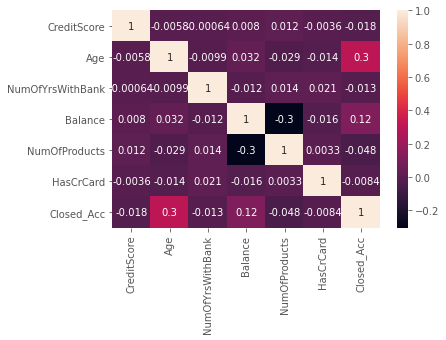

In [52]:
sns.heatmap(df.corr(),annot=True)

In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Features"] = input_cols.columns
vif["VIF"] = [variance_inflation_factor(input_cols.values, i) for i in range(input_cols.shape[1])]
print(vif)
incols_vif=input_cols[vif[vif['VIF']<=11]['Features']]

            Features        VIF
0        CreditScore  20.436361
1                Age  12.648665
2   NumOfYrsWithBank   3.858384
3            Balance   3.177816
4      NumOfProducts   7.783409
5          HasCrCard   3.293774
6  Geography_Germany   1.786866
7    Geography_Spain   1.486866
8        Gender_Male   2.167338


In [79]:
from sklearn.preprocessing import StandardScaler
standard=StandardScaler()
input_st=standard.fit_transform(input_cols)
input_st=pd.DataFrame(data=input_st,columns=input_cols.columns)

In [81]:
X = sm.add_constant(input_st)
X_train, X_test, y_train, y_test = train_test_split(X, list(target_cols), random_state = 1, test_size = 0.2)
logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.441514
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 7932
Model:                          Logit   Df Residuals:                     7922
Method:                           MLE   Df Model:                            9
Date:                Thu, 28 Jul 2022   Pseudo R-squ.:                  0.1218
Time:                        05:55:47   Log-Likelihood:                -3502.1
converged:                       True   LL-Null:                       -3988.0
Covariance Type:            nonrobust   LLR p-value:                2.100e-203
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.5864      0.033    -48.331      0.000      -1.651      -1.522
CreditSc

In [82]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
log_pred=logreg.predict(X_test)
accuracy_score(log_pred,y_test)

0.7887039838628341

In [83]:
scores = cross_val_score(   estimator = LogisticRegression(), 
                            X = X_train, 
                            y = y_train, 
                            cv = 5, 
                            scoring = 'r2',
                         )
print('All scores: ', scores)  
print("\nMinimum score obtained: ", round(min(scores), 4)) 
print("Maximum score obtained: ", round(max(scores), 4))  
print("Average score obtained: ", round(np.mean(scores), 4))

All scores:  [-0.24865085 -0.28387924 -0.26059439 -0.24493483 -0.27233906]

Minimum score obtained:  -0.2839
Maximum score obtained:  -0.2449
Average score obtained:  -0.2621
